In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Input, Dropout, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
  # 멀티헤드 어텐션
  x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
  x = LayerNormalization(epsilon=1e-6)(x)
  res = x + inputs

  #피드포워드 네트워크
  x = Dense(ff_dim, activation='relu')(res)
  x = Dense(inputs.shape[-1])(x)
  x = LayerNormalization(epsilon=1e-6)(x)
  return x + res


In [ ]:
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
  inputs = Input(shape=input_shape)
  x = inputs
  for _ in range(num_transformer_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
  x = Flatten()(x)
  for dim in mlp_units:
    x = Dense(dim, activation="relu")(x)
    x = Dropout(mlp_dropout)(x)
  outputs = Dense(1, activation="sigmoid")(x)
  return Model(inputs, outputs)

In [ ]:
# 모델생성
input_shape = (X_train.shape[1], 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4,
                    mlp_units=[128], mlp_dropout=0.4, dropout=0.25)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 10, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_52   │ (None, 10, 1)          │          7,169 │ input_layer_13[0][0],  │
│ (MultiHeadAttention)      │                        │                │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_104   │ (None, 10, 1)          │              2 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_104 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_126 (Dense)         │ (None, 10, 4)          │              8 │ add_104[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_127 (Dense)         │ (None, 10, 1)          │              5 │ dense_126[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_105   │ (None, 10, 1)          │              2 │ dense_127[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_105 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add_104[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_53   │ (None, 10, 1)          │          7,169 │ add_105[0][0],         │
│ (MultiHeadAttention)      │                        │                │ add_105[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_106   │ (None, 10, 1)          │              2 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_106 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add_105[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_128 (Dense)         │ (None, 10, 4)          │              8 │ add_106[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_129 (Dense)         │ (None, 10, 1)          │              5 │ dense_128[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_107   │ (None, 10, 1)          │              2 │ dense_129[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_107 (Add)        

 Total params: 30,281 (118.29 KB)

 Trainable params: 30,281 (118.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.5113 - loss: 0.6999 - val_accuracy: 0.4891 - val_loss: 0.6951
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4919 - loss: 0.7051 - val_accuracy: 0.4879 - val_loss: 0.6950
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5095 - loss: 0.6963 - val_accuracy: 0.4891 - val_loss: 0.6949
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5017 - loss: 0.7040 - val_accuracy: 0.4843 - val_loss: 0.6948
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5173 - loss: 0.6991 - val_accuracy: 0.4867 - val_loss: 0.6948
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4888 - loss: 0.7053 - val_accuracy: 0.4843 - val_loss: 0.6949
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5169 - loss: 0.6956 - val_accuracy: 0.4867 - val_loss: 0.6951
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5223 - loss: 0.6943 - val_accuracy: 0.48

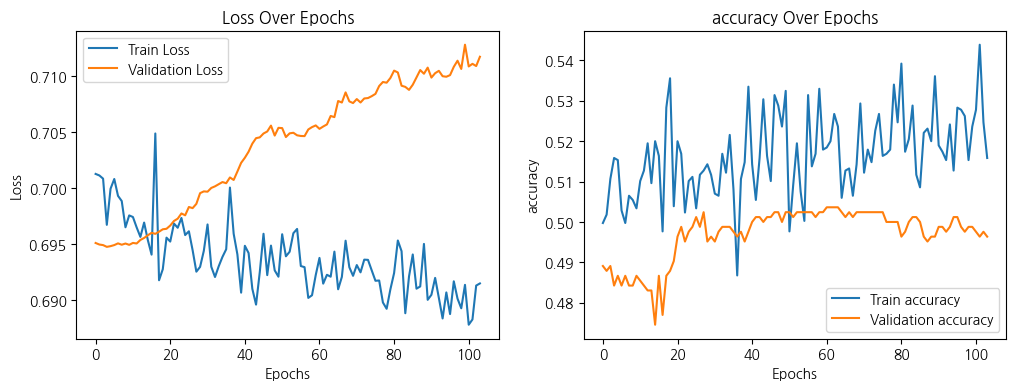

In [ ]:
modelpath = "./ystock_robust.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=100)
history_robust = model.fit(X_train, y_train, validation_data=[X_test, y_test],
                    epochs=200, batch_size=32,callbacks=[earlystop, checkpoint])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_robust.history['loss'], label='Train Loss')
plt.plot(history_robust.history['val_loss'], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_robust.history['accuracy'], label='Train accuracy')
plt.plot(history_robust.history['val_accuracy'], label="Validation accuracy")
plt.title("accuracy Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

트랜스포머를 이용한 주가 방향성 예측 모델 만들기

In [ ]:
!pip install yfinance

In [ ]:
# RSI지표등 금융 시계열에서 사용하는 지표를 자동으로 계산
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=94e1fdf63ba31d5e9062302baf0a80bc9b97e8524d9d580ca03e93616d69bb63
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import ta
import koreanize_matplotlib

* 애플(APPL)의 2013년 - 2023년까지 수집 후 훈련데이터로 사용
* 2024년 1월부터 4월까지 데이터를 테스트 데이터로 사용
* 금융데이터에서 1달은 = 21일, 1년은 252일

In [ ]:
# end + 1 날짜로 해야 함
train = yf.download('AAPL', start='2013-01-01', end='2024-01-01')
test = yf.download('AAPL', start='2024-01-01', end='2024-05-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705704,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494841,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035379,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941052,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983964,458707200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700


In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500
...,...,...,...,...,...,...
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.595917,48251800
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.463730,50558300
2024-04-26,169.880005,171.339996,169.179993,169.300003,168.875214,44838400


In [ ]:
train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705704,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494841,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035379,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941052,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983964,458707200


In [ ]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2013-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2768 non-null   float64
 1   High       2768 non-null   float64
 2   Low        2768 non-null   float64
 3   Close      2768 non-null   float64
 4   Adj Close  2768 non-null   float64
 5   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.4 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

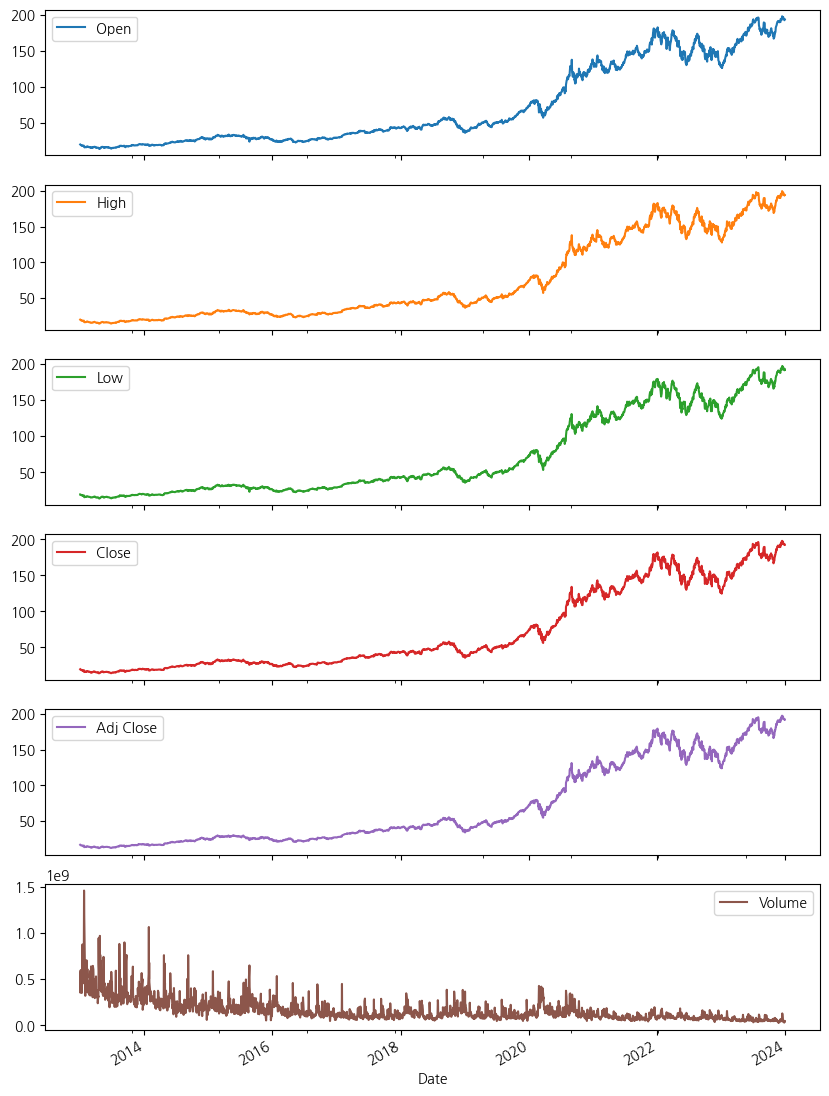

In [ ]:
train.plot(figsize=(10,15), subplots=True)

SMA14, VMA14, RSI_14

In [ ]:
train['sma_14'] = train['Close'].rolling(window=14).mean()

In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume,sma_14
Date,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705704,560518000,NaN
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494841,352965200,NaN
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035379,594333600,NaN
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941052,484156400,NaN
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983964,458707200,NaN
...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800,195.227859
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,195.201431
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700,195.260716


In [ ]:
test['sma_14'] = test['Close'].rolling(window=14).mean()

In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume,sma_14
Date,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700,NaN
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500,NaN
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600,NaN
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300,NaN
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500,NaN
...,...,...,...,...,...,...,...
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.595917,48251800,169.352856
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.463730,50558300,169.374999
2024-04-26,169.880005,171.339996,169.179993,169.300003,168.875214,44838400,169.435714


In [ ]:
train['vma_14'] = train['Volume'].rolling(window=14).mean()
test['vma_14'] = test['Volume'].rolling(window=14).mean()

In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume,sma_14,vma_14
Date,,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705704,560518000,NaN,NaN
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494841,352965200,NaN,NaN
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035379,594333600,NaN,NaN
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941052,484156400,NaN,NaN
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983964,458707200,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800,195.227859,5.857288e+07
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,195.201431,5.587937e+07
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700,195.260716,5.637923e+07


In [ ]:
train['rsi_14'] = ta.momentum.RSIIndicator(train['Close']).rsi()
test['rsi_14'] = ta.momentum.RSIIndicator(test['Close']).rsi()

In [ ]:
train.head(20)

,Open,High,Low,Close,Adj Close,Volume,sma_14,vma_14,rsi_14
Date,,,,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.705704,560518000,NaN,NaN,NaN
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.494841,352965200,NaN,NaN,NaN
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.035379,594333600,NaN,NaN,NaN
2013-01-07,18.642857,18.903570,18.400000,18.710714,15.941052,484156400,NaN,NaN,NaN
2013-01-08,18.900356,18.996071,18.616072,18.761070,15.983964,458707200,NaN,NaN,NaN
2013-01-09,18.660713,18.750357,18.428213,18.467857,15.734149,407604400,NaN,NaN,NaN
2013-01-10,18.876785,18.882856,18.411428,18.696787,15.929191,601146000,NaN,NaN,NaN
2013-01-11,18.607143,18.761429,18.536428,18.582144,15.831511,350506800,NaN,NaN,NaN
2013-01-14,17.952856,18.125000,17.803928,17.919643,15.267080,734207600,NaN,NaN,NaN


In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume,sma_14,vma_14,rsi_14
Date,,,,,,,,,
2013-01-22,18.020000,18.138571,17.736786,18.027500,15.358976,461546400,18.442500,5.357050e+08,34.843050
2013-01-23,18.171785,18.392500,18.027500,18.357500,15.640128,861509600,18.353163,5.572044e+08,42.653035
2013-01-24,16.428572,16.633215,16.080357,16.089287,13.707664,1460852400,18.119490,6.363392e+08,22.600673
2013-01-25,16.131786,16.293928,15.535714,15.710000,13.384521,1208026400,17.897245,6.801744e+08,20.836621
2013-01-28,15.636786,16.186071,15.566429,16.065357,13.687276,785517600,17.708291,7.017002e+08,26.615905
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800,195.227859,5.857288e+07,54.609714
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,195.201431,5.587937e+07,53.026883
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700,195.260716,5.637923e+07,53.291938


In [ ]:
train['pct_change'] = train['Close'].pct_change()
test['pct_change'] = test['Close'].pct_change()

<ipython-input-23-e0e405fe5a6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pct_change'] = train['Close'].pct_change()
<ipython-input-23-e0e405fe5a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pct_change'] = test['Close'].pct_change()


In [ ]:
train['pct_change'].describe()

,pct_change
count,2754.000000
mean,0.001020
std,0.017870
min,-0.128647
25%,-0.007406
50%,0.000889
75%,0.010222
max,0.119808


In [ ]:
train['target'] = np.where(train['pct_change'] > 0.0008, 1, 0)
test['target'] = np.where(test['pct_change'] > 0.0008, 1, 0)

<ipython-input-25-80d2917f9161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] = np.where(train['pct_change'] > 0.0008, 1, 0)
<ipython-input-25-80d2917f9161>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['target'] = np.where(test['pct_change'] > 0.0008, 1, 0)


In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
train

,Open,High,Low,Close,Adj Close,Volume,sma_14,vma_14,rsi_14,pct_change,target
Date,,,,,,,,,,,
2013-01-23,18.171785,18.392500,18.027500,18.357500,15.640128,861509600,18.353163,5.572044e+08,42.653035,0.018305,1
2013-01-24,16.428572,16.633215,16.080357,16.089287,13.707664,1460852400,18.119490,6.363392e+08,22.600673,-0.123558,0
2013-01-25,16.131786,16.293928,15.535714,15.710000,13.384521,1208026400,17.897245,6.801744e+08,20.836621,-0.023574,0
2013-01-28,15.636786,16.186071,15.566429,16.065357,13.687276,785517600,17.708291,7.017002e+08,26.615905,0.022620,1
2013-01-29,16.375000,16.435715,16.147142,16.366785,13.944088,571158000,17.537271,7.097324e+08,31.203836,0.018763,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800,195.227859,5.857288e+07,54.609714,-0.005547,0
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,195.201431,5.587937e+07,53.026883,-0.002841,0
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700,195.260716,5.637923e+07,53.291938,0.000518,0


In [ ]:
train['target'] = train['target'].shift(-1)
test['target'] = test['target'].shift(-1)

<ipython-input-28-4d646fa3db7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] = train['target'].shift(-1)


In [ ]:
train = train.dropna()
test = test.dropna()

In [ ]:
X = train.drop(['target'], axis=1)
y = train['target']

In [ ]:
X

,Open,High,Low,Close,Adj Close,Volume,sma_14,vma_14,rsi_14,pct_change
Date,,,,,,,,,,
2013-01-23,18.171785,18.392500,18.027500,18.357500,15.640118,861509600,18.353163,5.572044e+08,42.653035,0.018305
2013-01-24,16.428572,16.633215,16.080357,16.089287,13.707662,1460852400,18.119490,6.363392e+08,22.600673,-0.123558
2013-01-25,16.131786,16.293928,15.535714,15.710000,13.384519,1208026400,17.897245,6.801744e+08,20.836621,-0.023574
2013-01-28,15.636786,16.186071,15.566429,16.065357,13.687276,785517600,17.708291,7.017002e+08,26.615905,0.022620
2013-01-29,16.375000,16.435715,16.147142,16.366785,13.944088,571158000,17.537271,7.097324e+08,31.203836,0.018763
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,196.100006,197.080002,193.500000,194.679993,193.944031,46482500,194.930001,5.902050e+07,57.752982,-0.000770
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800,195.227859,5.857288e+07,54.609714,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,195.201431,5.587937e+07,53.026883,-0.002841


In [ ]:
y.value_counts()

,count
target,
1.0,1379
0.0,1374


데이터 정규화

<Axes: >

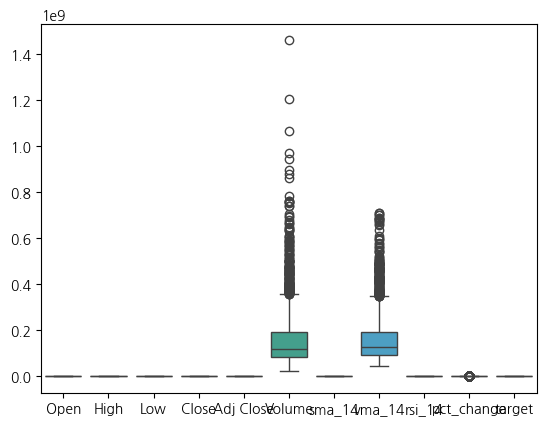

In [ ]:
sns.boxplot(train)

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [ ]:
rs = RobustScaler()
mms = MinMaxScaler()
X_rs_scaled = rs.fit_transform(X.copy())
X_mms_scaled = mms.fit_transform(X.copy())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rs_scaled, y, shuffle=False, test_size=0.3, random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_mms_scaled, y, shuffle=False, test_size=0.3, random_state=10)

# 트랜스포머 모델 정의

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Input, Dropout, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
  # 멀티헤드 어텐션
  x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
  x = LayerNormalization(epsilon=1e-6)(x)
  res = x + inputs

  #피드포워드 네트워크
  x = Dense(ff_dim, activation='relu')(res)
  x = Dense(inputs.shape[-1])(x)
  x = LayerNormalization(epsilon=1e-6)(x)
  return x + res


In [ ]:
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
  inputs = Input(shape=input_shape)
  x = inputs
  for _ in range(num_transformer_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
  x = Flatten()(x)
  for dim in mlp_units:
    x = Dense(dim, activation="relu")(x)
    x = Dropout(mlp_dropout)(x)
  outputs = Dense(1, activation="sigmoid")(x)
  return Model(inputs, outputs)

In [ ]:
# 모델생성
input_shape = (X_train.shape[1], 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4,
                    mlp_units=[128], mlp_dropout=0.4, dropout=0.25)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 10, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_52   │ (None, 10, 1)          │          7,169 │ input_layer_13[0][0],  │
│ (MultiHeadAttention)      │                        │                │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_104   │ (None, 10, 1)          │              2 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_104 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_126 (Dense)         │ (None, 10, 4)          │              8 │ add_104[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_127 (Dense)         │ (None, 10, 1)          │              5 │ dense_126[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_105   │ (None, 10, 1)          │              2 │ dense_127[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_105 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add_104[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_53   │ (None, 10, 1)          │          7,169 │ add_105[0][0],         │
│ (MultiHeadAttention)      │                        │                │ add_105[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_106   │ (None, 10, 1)          │              2 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_106 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add_105[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_128 (Dense)         │ (None, 10, 4)          │              8 │ add_106[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_129 (Dense)         │ (None, 10, 1)          │              5 │ dense_128[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_107   │ (None, 10, 1)          │              2 │ dense_129[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_107 (Add)        

 Total params: 30,281 (118.29 KB)

 Trainable params: 30,281 (118.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 31s 172ms/step - accuracy: 0.5113 - loss: 0.6999 - val_accuracy: 0.4891 - val_loss: 0.6951
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4919 - loss: 0.7051 - val_accuracy: 0.4879 - val_loss: 0.6950
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5095 - loss: 0.6963 - val_accuracy: 0.4891 - val_loss: 0.6949
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5017 - loss: 0.7040 - val_accuracy: 0.4843 - val_loss: 0.6948
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5173 - loss: 0.6991 - val_accuracy: 0.4867 - val_loss: 0.6948
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4888 - loss: 0.7053 - val_accuracy: 0.4843 - val_loss: 0.6949
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5169 - loss: 0.6956 - val_accuracy: 0.4867 - val_loss: 0.6951
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5223 - loss: 0.6943 - val_accuracy: 0.48

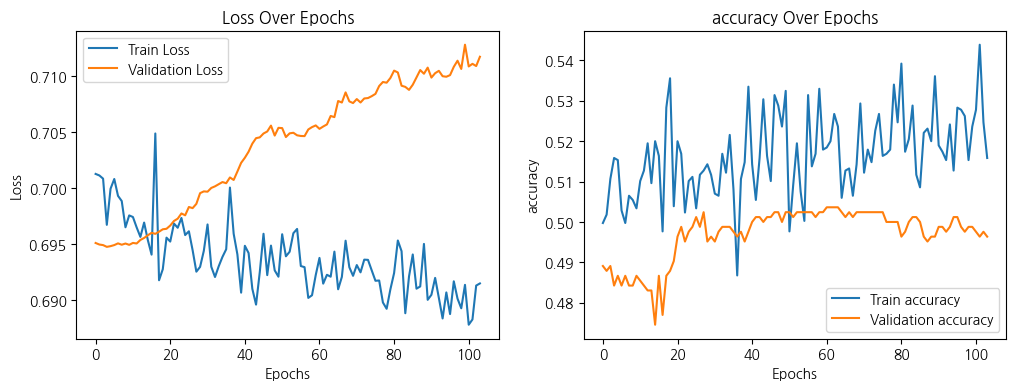

In [ ]:
modelpath = "./ystock_robust.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=100)
history_robust = model.fit(X_train, y_train, validation_data=[X_test, y_test],
                    epochs=200, batch_size=32,callbacks=[earlystop, checkpoint])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_robust.history['loss'], label='Train Loss')
plt.plot(history_robust.history['val_loss'], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_robust.history['accuracy'], label='Train accuracy')
plt.plot(history_robust.history['val_accuracy'], label="Validation accuracy")
plt.title("accuracy Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [ ]:
# 모델생성
input_shape = (X2_train.shape[1], 1)
X2_train = X2_train.reshape((X2_train.shape[0], X2_train.shape[1], 1))
X2_test = X2_test.reshape((X2_test.shape[0], X2_test.shape[1], 1))

model2 = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4,
                    mlp_units=[128], mlp_dropout=0.4, dropout=0.25)
model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model2.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 10, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_56   │ (None, 10, 1)          │          7,169 │ input_layer_14[0][0],  │
│ (MultiHeadAttention)      │                        │                │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_112   │ (None, 10, 1)          │              2 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_112 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_136 (Dense)         │ (None, 10, 4)          │              8 │ add_112[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_137 (Dense)         │ (None, 10, 1)          │              5 │ dense_136[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_113   │ (None, 10, 1)          │              2 │ dense_137[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_113 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add_112[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_57   │ (None, 10, 1)          │          7,169 │ add_113[0][0],         │
│ (MultiHeadAttention)      │                        │                │ add_113[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_114   │ (None, 10, 1)          │              2 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_114 (Add)             │ (None, 10, 1)          │              0 │ layer_normalization_1… │
│                           │                        │                │ add_113[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_138 (Dense)         │ (None, 10, 4)          │              8 │ add_114[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_139 (Dense)         │ (None, 10, 1)          │              5 │ dense_138[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_115   │ (None, 10, 1)          │              2 │ dense_139[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_115 (Add)        

 Total params: 30,281 (118.29 KB)

 Trainable params: 30,281 (118.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.5008 - loss: 0.6954 - val_accuracy: 0.4891 - val_loss: 0.6943
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5042 - loss: 0.6934 - val_accuracy: 0.4794 - val_loss: 0.6942
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5057 - loss: 0.6942 - val_accuracy: 0.4818 - val_loss: 0.6941
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4860 - loss: 0.6948 - val_accuracy: 0.4879 - val_loss: 0.6940
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4932 - loss: 0.6932 - val_accuracy: 0.4758 - val_loss: 0.6941
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5107 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6944
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4961 - loss: 0.6937 - val_accuracy: 0.4964 - val_loss: 0.6946
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4823 - loss: 0.6949 - val_accuracy: 0.492

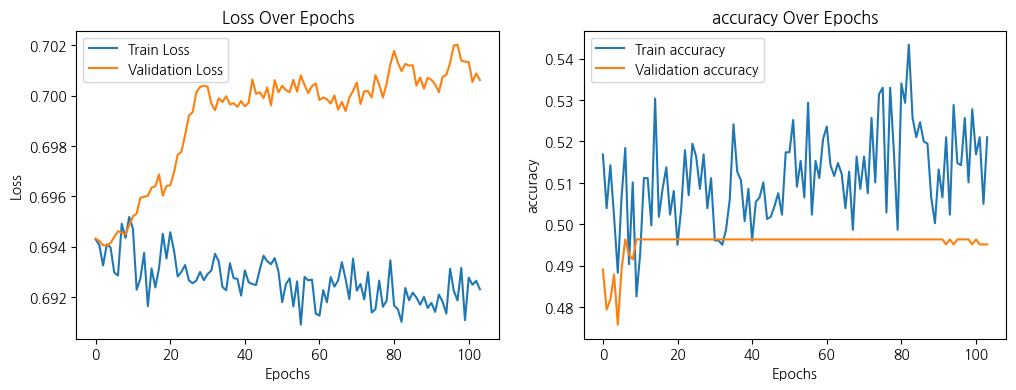

In [ ]:
modelpath = "./ystock_minmax.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=100)
history_mmx = model2.fit(X2_train, y2_train, validation_data=[X2_test, y2_test],
                    epochs=200, batch_size=32, callbacks=[earlystop, checkpoint])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mmx.history['loss'], label='Train Loss')
plt.plot(history_mmx.history['val_loss'], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mmx.history['accuracy'], label='Train accuracy')
plt.plot(history_mmx.history['val_accuracy'], label="Validation accuracy")
plt.title("accuracy Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [ ]:
test['target'] = test['target'].astype(int)
test

,Open,High,Low,Close,Adj Close,Volume,sma_14,vma_14,rsi_14,pct_change,target
Date,,,,,,,,,,,
2024-01-23,195.020004,195.750000,193.830002,195.179993,194.442154,42355600,186.522142,5.665789e+07,74.450966,0.006653,0
2024-01-24,195.419998,196.380005,194.339996,194.500000,193.764725,53631300,187.254284,5.631623e+07,71.586088,-0.003484,0
2024-01-25,195.220001,196.270004,193.110001,194.169998,193.435989,54822100,188.129998,5.509041e+07,70.174806,-0.001697,0
2024-01-26,194.270004,194.759995,191.940002,192.419998,191.692581,44594000,188.932856,5.382546e+07,63.073498,-0.009013,0
2024-01-29,192.009995,192.199997,189.580002,191.729996,191.005203,47145600,189.373570,5.296839e+07,60.474954,-0.003586,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.481216,49537800,169.338571,5.890733e+07,42.172335,0.006392,1
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.595917,48251800,169.352856,5.851786e+07,46.724659,0.012702,1
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.463730,50558300,169.374999,5.912522e+07,48.515821,0.005147,0


In [ ]:
test_X = test.drop('target', axis=1)
test_y = test['target']

In [ ]:
test_X

,Open,High,Low,Close,Adj Close,Volume,sma_14,vma_14,rsi_14,pct_change
Date,,,,,,,,,,
2024-01-23,195.020004,195.750000,193.830002,195.179993,194.442154,42355600,186.522142,5.665789e+07,74.450966,0.006653
2024-01-24,195.419998,196.380005,194.339996,194.500000,193.764725,53631300,187.254284,5.631623e+07,71.586088,-0.003484
2024-01-25,195.220001,196.270004,193.110001,194.169998,193.435989,54822100,188.129998,5.509041e+07,70.174806,-0.001697
2024-01-26,194.270004,194.759995,191.940002,192.419998,191.692581,44594000,188.932856,5.382546e+07,63.073498,-0.009013
2024-01-29,192.009995,192.199997,189.580002,191.729996,191.005203,47145600,189.373570,5.296839e+07,60.474954,-0.003586
...,...,...,...,...,...,...,...,...,...,...
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.481216,49537800,169.338571,5.890733e+07,42.172335,0.006392
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.595917,48251800,169.352856,5.851786e+07,46.724659,0.012702
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.463730,50558300,169.374999,5.912522e+07,48.515821,0.005147


In [ ]:
test_y

,target
Date,
2024-01-23,0
2024-01-24,0
2024-01-25,0
2024-01-26,0
2024-01-29,0
...,...
2024-04-23,1
2024-04-24,1
2024-04-25,0


In [ ]:
test_X_roust = rs.transform(test_X.copy())
test_X_mms = mms.transform(test_X.copy())

In [ ]:
test_X_roust

array([[ 1.48810294e+00,  1.47058832e+00,  1.49412760e+00,
         1.48119526e+00,  1.49407224e+00, -7.11517347e-01,
         1.40126601e+00, -6.93496259e-01,  9.99393381e-01,
         3.26760912e-01],
       [ 1.49204396e+00,  1.47671126e+00,  1.49920369e+00,
         1.47452670e+00,  1.48743973e+00, -6.09032971e-01,
         1.40845316e+00, -6.96838046e-01,  8.47901632e-01,
        -2.48077296e-01],
       [ 1.49007345e+00,  1.47564218e+00,  1.48696127e+00,
         1.47129044e+00,  1.48422119e+00, -5.98209839e-01,
         1.41704970e+00, -7.08827943e-01,  7.73274514e-01,
        -1.46728821e-01],
       [ 1.48071342e+00,  1.46096657e+00,  1.47531602e+00,
         1.45412853e+00,  1.46715200e+00, -6.91172621e-01,
         1.42493104e+00, -7.21200562e-01,  3.97764664e-01,
        -5.61593713e-01],
       [ 1.45844621e+00,  1.43608626e+00,  1.45182641e+00,
         1.44736181e+00,  1.46042208e+00, -6.67981233e-01,
         1.42925735e+00, -7.29583604e-01,  2.60356378e-01,
        -2.

In [ ]:
test_X_mms

array([[0.98371017, 0.97912045, 0.9827009 , 0.98409009, 0.9842568 ,
        0.01274168, 0.951613  , 0.01917593, 0.77070264, 0.54456564],
       [0.98588211, 0.98251948, 0.98548401, 0.98039774, 0.98060309,
        0.02058945, 0.955667  , 0.01866335, 0.72952022, 0.50376494],
       [0.98479614, 0.981926  , 0.97877176, 0.97860584, 0.97883007,
        0.02141823, 0.96051598, 0.01682426, 0.70923314, 0.51095842],
       [0.97963771, 0.97377913, 0.97238692, 0.96910336, 0.96942702,
        0.01429958, 0.96496154, 0.01492647, 0.6071523 , 0.48151226],
       [0.96736598, 0.95996733, 0.95950809, 0.96535666, 0.96571966,
        0.01607547, 0.96740186, 0.01364063, 0.56979841, 0.50335443],
       [0.96155598, 0.95780927, 0.94799354, 0.94531999, 0.94589283,
        0.02214018, 0.96854884, 0.01503564, 0.40308885, 0.44032533],
       [0.94037915, 0.93245165, 0.93096731, 0.92555484, 0.92633487,
        0.02186763, 0.96784087, 0.01596527, 0.28417597, 0.43987554],
       [0.92381788, 0.93164232, 0.9280750

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

In [ ]:
model_robust = load_model("/content/ystock_robust.keras")
model_mms = load_model("/content/ystock_minmax.keras")

In [ ]:
robust_pred = model_robust.predict(test_X_roust)
robust_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step


array([[0.51589763],
       [0.5292039 ],
       [0.52391386],
       [0.5263136 ],
       [0.5156842 ],
       [0.52188015],
       [0.5190954 ],
       [0.48316965],
       [0.5093149 ],
       [0.48925284],
       [0.48905125],
       [0.5015255 ],
       [0.5021104 ],
       [0.49576253],
       [0.5024153 ],
       [0.50566995],
       [0.49367532],
       [0.49148405],
       [0.49687937],
       [0.49314907],
       [0.48372164],
       [0.48475242],
       [0.49926376],
       [0.4954625 ],
       [0.48674306],
       [0.4956496 ],
       [0.5089628 ],
       [0.4982013 ],
       [0.52122   ],
       [0.52246714],
       [0.5041314 ],
       [0.4968064 ],
       [0.4766808 ],
       [0.4746976 ],
       [0.48739567],
       [0.50750566],
       [0.47898725],
       [0.5002699 ],
       [0.48696563],
       [0.48298466],
       [0.48503223],
       [0.56701124],
       [0.48865548],
       [0.49767342],
       [0.49624982],
       [0.46882632],
       [0.5059449 ],
       [0.496

In [ ]:
robust_pred = robust_pred.round(0).astype(int)

In [ ]:
print(classification_report(test_y, robust_pred))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        42
           1       0.32      0.31      0.31        26

    accuracy                           0.49        68
   macro avg       0.45      0.45      0.45        68
weighted avg       0.48      0.49      0.48        68



In [ ]:
mms_pred = model_mms.predict(test_X_mms)
mms_pred = mms_pred.round(0).astype(int)
mms_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [ ]:
print(classification_report(test_y, mms_pred))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        42
           1       0.24      0.19      0.21        26

    accuracy                           0.46        68
   macro avg       0.40      0.41      0.40        68
weighted avg       0.43      0.46      0.44        68



변수 재조정 후 분석

In [ ]:
train.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'sma_14',
       'vma_14', 'rsi_14', 'pct_change', 'target'],
      dtype='object')

In [ ]:
X = train.drop(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'target'], axis=1)
y = train['target']

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
rs2 = RobustScaler()
X_scaled = rs2.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, shuffle=False, test_size=0.3, random_state=10)

In [ ]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Input, Dropout, Flatten
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
  # 멀티헤드 어텐션
  x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
  x = LayerNormalization(epsilon=1e-6)(x)
  res = x + inputs

  #피드포워드 네트워크
  x = Dense(ff_dim, activation='relu')(res)
  x = Dense(inputs.shape[-1])(x)
  x = LayerNormalization(epsilon=1e-6)(x)
  return x + res


In [ ]:
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
  inputs = Input(shape=input_shape)
  x = inputs
  for _ in range(num_transformer_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
  x = Flatten()(x)
  for dim in mlp_units:
    x = Dense(dim, activation="relu")(x)
    x = Dropout(mlp_dropout)(x)
  outputs = Dense(1, activation="sigmoid")(x)
  return Model(inputs, outputs)

In [ ]:
# 모델생성
input_shape = (X_train.shape[1], 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4,
                    mlp_units=[128], mlp_dropout=0.4, dropout=0.25)
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 4, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 4, 1)           │          7,169 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 4, 1)           │              2 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 4, 1)           │              0 │ layer_normalization[0… │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 4, 4)           │              8 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 4, 1)           │              5 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 4, 1)           │              2 │ dense_1[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 4, 1)           │              0 │ layer_normalization_1… │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 4, 1)           │          7,169 │ add_1[0][0],           │
│ (MultiHeadAttention)      │                        │                │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 4, 1)           │              2 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 4, 1)           │              0 │ layer_normalization_2… │
│                           │                        │                │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4, 4)           │              8 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4, 1)           │              5 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 4, 1)           │              2 │ dense_3[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 4, 1)           │              0 │ layer_normalization_3… │
│                      

 Total params: 29,513 (115.29 KB)

 Trainable params: 29,513 (115.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.5150 - loss: 0.7011 - val_accuracy: 0.4964 - val_loss: 0.7016
Epoch 2/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5121 - loss: 0.6994 - val_accuracy: 0.4964 - val_loss: 0.7008
Epoch 3/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5187 - loss: 0.7010 - val_accuracy: 0.4964 - val_loss: 0.7001
Epoch 4/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5107 - loss: 0.6971 - val_accuracy: 0.4952 - val_loss: 0.6994
Epoch 5/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4960 - loss: 0.6982 - val_accuracy: 0.4964 - val_loss: 0.6989
Epoch 6/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5301 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6983
Epoch 7/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5149 - loss: 0.6922 - val_accuracy: 0.5048 - val_loss: 0.6981
Epoch 8/200
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5247 - loss: 0.6938 - val_accuracy: 0

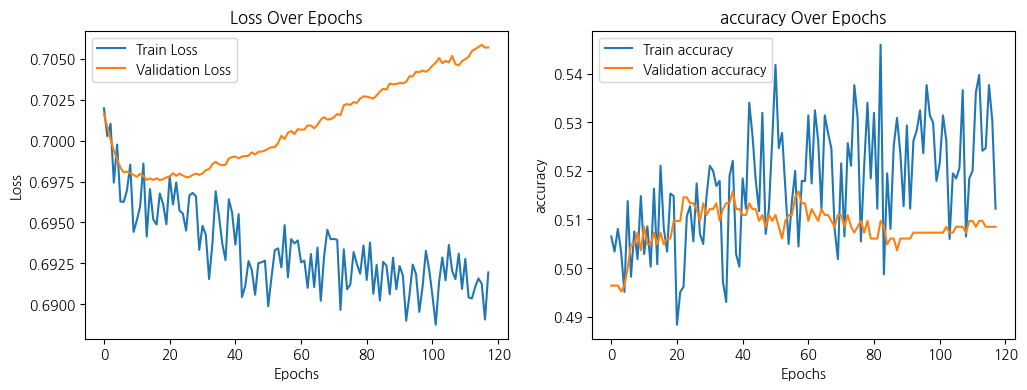

In [ ]:
modelpath = "./ystock_robust_ma_rsi.keras"
checkpoint = ModelCheckpoint(filepath=modelpath, save_best_only=True)
earlystop = EarlyStopping(patience=100)
history_robust = model.fit(X_train, y_train, validation_data=[X_test, y_test],
                    epochs=200, batch_size=32,callbacks=[earlystop, checkpoint])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_robust.history['loss'], label='Train Loss')
plt.plot(history_robust.history['val_loss'], label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_robust.history['accuracy'], label='Train accuracy')
plt.plot(history_robust.history['val_accuracy'], label="Validation accuracy")
plt.title("accuracy Over Epochs")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()